# Exploratory Data Analysis of GEF projects and DHS survey in Kenya
In this notebook, we explored a preprocessed datasets that contains children's health measures, health risk factors, distances to GEF locations and some other variables. The goal is to get some desciptive statistics of the dataset before running the QGI model. A script used to combine relevant dataset can be found [here](https://github.com/JiayingChen0307/gef/blob/master/propensity_prep.py).

In [116]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import scipy.stats

In [118]:
data = pd.read_csv('/Users/jiaying/Downloads/geolab/GEF/propensity_input.csv')
data.head()

,HV001,distance,HV204,HV237,HV206,HV230B,HV270,HV215,SH139A,HV025,...,Annual_Precipitation_2015,All_Population_Count_2015,Nightlights_Composite,Mean_Temperature_2015,Aridity_2015,Malaria_Prevalence_2015,Gross_Cell_Production,Travel_Times_2015,Proximity_to_Water,Land_Surface_Temperature_2015
0,1,0.036943,0.538462,0.384615,0.923077,NaN,2.846154,1.0,0.5,1.0,...,85.666664,287157.250000,19.163509,19.4,24.245283,NaN,3506.933105,0.0,66060.56151,21.775833
1,2,0.031541,0.642857,0.500000,0.000000,NaN,2.714286,1.0,1.0,1.0,...,85.666664,217476.812500,17.713884,19.4,24.245283,NaN,3506.933105,0.0,66118.70090,21.775833
2,3,0.044070,0.444444,0.666667,1.000000,NaN,3.111111,1.0,1.0,1.0,...,85.666664,340274.437500,18.241889,19.4,24.245283,NaN,3506.933105,0.0,65300.63009,20.174166
3,4,0.093150,0.000000,1.000000,1.000000,1.0,3.500000,1.0,1.0,1.0,...,85.666664,57693.277344,4.152706,19.4,24.245283,NaN,3506.933105,0.0,62065.04563,19.097500
4,5,0.047382,0.600000,0.400000,0.600000,NaN,3.000000,1.0,1.0,1.0,...,85.666664,258130.281250,15.378392,19.4,24.245283,NaN,3506.933105,0.0,64454.97429,20.174166


In [135]:
desc = {'Min':data.min(axis=0),'Median':data.median(axis=0),'Max':data.max(axis=0)}
desc = pd.DataFrame(desc)
desc

,Min,Median,Max
HV001,1.000000,811.000000,1612.000000
distance,0.000000,0.236046,3.311814
HV204,0.000000,0.181818,1.000000
HV237,0.000000,0.411765,1.000000
HV206,0.000000,0.058824,1.000000
HV230B,0.000000,1.000000,1.000000
HV270,0.000000,1.750000,4.000000
HV215,0.714286,1.000000,2.000000
SH139A,0.000000,1.000000,1.000000
HV025,0.000000,0.000000,1.000000


(array([366., 142., 187., 166., 149., 117., 140.,  75.,  58.,  34.,  14.,
         25.,   9.,  15.,   7.,   7.,   7.,   1.,   2.,  14.,   0.,   1.,
          8.,   0.,   1.,   1.,   1.,   0.,   0.,   4.,   1.,   1.,   6.,
          5.,   0.,   0.,   1.,   2.,   2.,   1.,   2.,   0.,   0.,   1.,
          2.,   1.,   2.,   1.,   1.,   5.]),
 array([0.        , 0.06623628, 0.13247257, 0.19870885, 0.26494513,
        0.33118141, 0.3974177 , 0.46365398, 0.52989026, 0.59612655,
        0.66236283, 0.72859911, 0.79483539, 0.86107168, 0.92730796,
        0.99354424, 1.05978053, 1.12601681, 1.19225309, 1.25848937,
        1.32472566, 1.39096194, 1.45719822, 1.52343451, 1.58967079,
        1.65590707, 1.72214335, 1.78837964, 1.85461592, 1.9208522 ,
        1.98708849, 2.05332477, 2.11956105, 2.18579733, 2.25203362,
        2.3182699 , 2.38450618, 2.45074247, 2.51697875, 2.58321503,
        2.64945131, 2.7156876 , 2.78192388, 2.84816016, 2.91439645,
        2.98063273, 3.04686901, 3.11310529, 3.

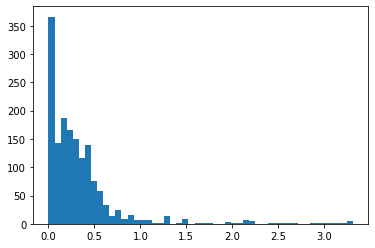

In [141]:
#get the distance distribution of survey locations
plt.hist(data['distance'],bins=50)

In [124]:
# this function plots the relationship between a specified outcome and the distance to GEF locations
def plot_distance_correlation(field,outcome):
    temp = data[['distance',field]].dropna()
    cor, p_value = scipy.stats.pearsonr(temp['distance'],temp[field])
    print('correlation coefficient:',cor,'p-value:',p_value)
    plt.scatter(temp['distance'],temp[field])
    plt.xlabel('distance')
    plt.ylabel(outcome)  

correlation coefficient: -0.09921007413408989 p-value: 7.648507269583676e-05


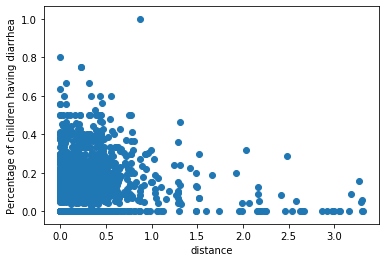

In [125]:
#Percentage of children having diarrhea in the past two weeks
plot_distance_correlation('diarrhea','Percentage of children having diarrhea')

correlation coefficient: -0.1192579613402836 p-value: 1.939240311075765e-06


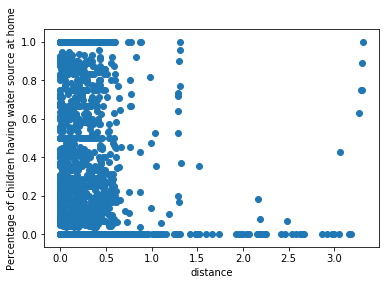

In [126]:
#Percentage of children having water source at home
plot_distance_correlation('HV204','Percentage of children having water source at home')

correlation coefficient: -0.010781297349393894 p-value: 0.7567343103919772


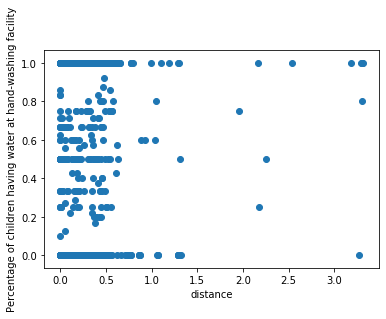

In [127]:
#Percentage of children having water at hand-washing facility
plot_distance_correlation('HV230B','Percentage of children having water at hand-washing facility')

correlation coefficient: -0.18745438934485215 p-value: 1.9910949782615184e-10


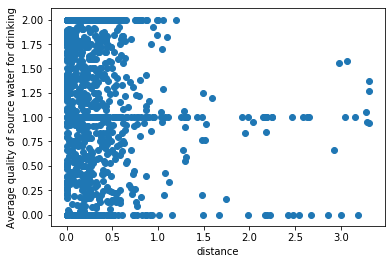

In [128]:
#Average quality of source water for drinking
plot_distance_correlation('HV201','Average quality of source water for drinking')

correlation coefficient: -0.1628767191820381 p-value: 6.989432144239035e-11


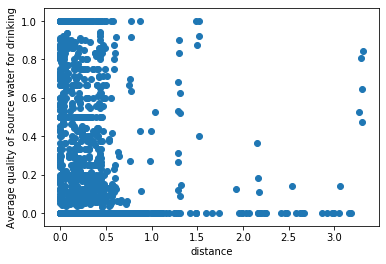

In [129]:
#Percentage of children having electricity at home
plot_distance_correlation('HV206','Average quality of source water for drinking')

correlation coefficient: -0.31713674161153016 p-value: 1.6526802056364865e-37


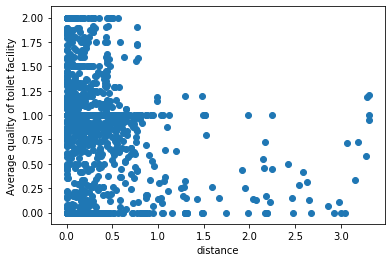

In [131]:
#Average quality of toilet facility
plot_distance_correlation('HV205','Average quality of toilet facility')

correlation coefficient: -0.06758881569765168 p-value: 0.007124783824960689


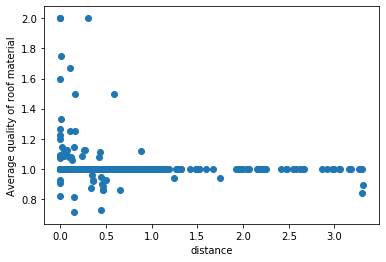

In [132]:
#Average quality of roof material
plot_distance_correlation('HV215','Average quality of roof material')

correlation coefficient: -0.2923370903073377 p-value: 1.3946719673501876e-32


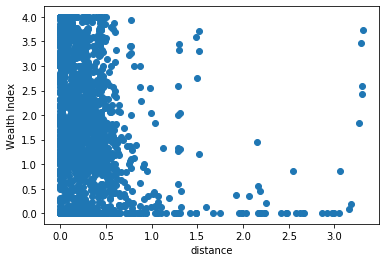

In [133]:
#Wealth index
plot_distance_correlation('HV270','Wealth Index')

correlation coefficient: -0.30841447031948876 p-value: 8.56820703532612e-36


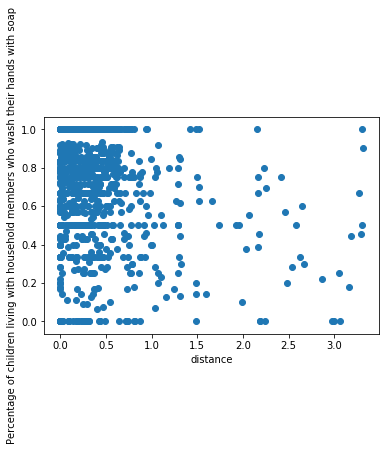

In [136]:
#Percentage of children living with household members who wash their hands with soap
plot_distance_correlation('SH139A','Percentage of children living with household members who wash their hands with soap')

correlation coefficient: -0.42291507607107415 p-value: 9.54914534468221e-70


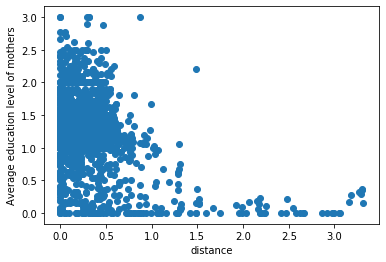

In [137]:
#Average education level of mothers
plot_distance_correlation('V106','Average education level of mothers')

correlation coefficient: -0.31347167869572734 p-value: 1.8672966968030437e-37


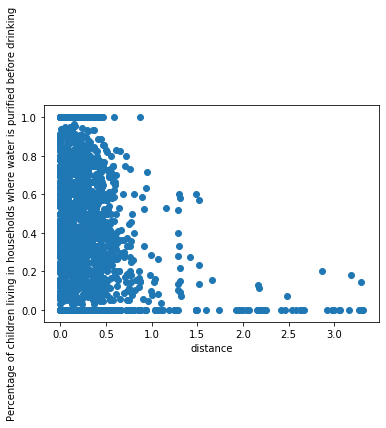

In [138]:
#Percentage of children living in households where water is purified before drinking
plot_distance_correlation('HV237','Percentage of children living in households where water is purified before drinking')

In [52]:
#source of drinking water
answers =["PIPED WATER","Piped into dwelling","Piped to yard/plot",
          "Public tap/standpipe","TUBE WELL WATER","Tube well or borehole",
          "DUG WELL (OPEN/PROTECTED)","Protected well","Unprotected well",
          "SURFACE WATER","Protected spring","Unprotected spring",
          "River/dam/lake/ponds/stream/canal/irrigation channel","Rainwater",
          "Tanker truck","Cart with small tank","Bottled water","Other"]
for answer in answers:
    co = get_rate(var,covar,'HV201',[answer])
    cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
    if (p_value<0.05):
        print(answer + ':' , cor, p_value)

/Users/jiaying/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Piped to yard/plot: -0.07772442020374301 0.0019064575376163565
Protected well: 0.05213961220651598 0.03745229645596812
Protected spring: 0.0883782270983399 0.0004131618818313574
Cart with small tank: -0.060249249590177995 0.016172920108331452


In [32]:
co = get_rate(var,covar,'HV201',['Piped to yard/plot','Piped into dwelling',"Public tap/standpipe","TUBE WELL WATER","Tube well or borehole"])
cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
print(cor,p_value)

NameError: name 'diarrhea' is not defined

In [55]:
#toilet type
answers = ["FLUSH TOILET","Flush to piped sewer system","Flush to septic tank",
           "Flush to pit latrine","Flush to somewhere else","Flush, don't know where",
           "PIT TOILET LATRINE","Ventilated Improved Pit latrine (VIP)","Pit latrine with slab",
           "Pit latrine without slab/open pit","NO FACILITY","No facility/bush/field",
           "Composting toilet","Bucket toilet","Hanging toilet/latrine","Other"]
for answer in answers:
    co = get_rate(var,covar,'HV205',[answer])
    cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
    if (p_value<0.05):
        print(answer + ':' , cor, p_value)

Flush to piped sewer system: -0.056872544214856664 0.023209067331337388
Flush to septic tank: -0.06220424010602309 0.01302164262377787
Flush to pit latrine: 0.04929473722857128 0.049169032686743386


In [57]:
co = get_rate(var,covar,'HV205',['Flush to piped sewer system','Flush to septic tank'])
cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
print(cor,p_value)

-0.07925764495096327 0.0015462454277312238


In [59]:
#main roof material
answers = ["No roof","Thatch / grass / makuti","Dung / mud / sod","Iron sheets","Tin cans",
           "Asbestos sheet","Concrete","Tiles","Other"]
for answer in answers:
    co = get_rate(var,covar,'HV215',[answer])
    cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
    if (p_value<0.05):
        print(answer + ':' , cor, p_value)

No roof: 0.050351894167655155 0.04449873300162181
Tiles: -0.0637556431213252 0.010920478150294177


In [61]:
co = get_rate(var,covar,'HV215',["Thatch / grass / makuti","Dung / mud / sod","Iron sheets","Tin cans",
           "Asbestos sheet","Concrete","Tiles","Other"])
cor, p_value = scipy.stats.pearsonr(list(co.values()),list(diarrhea.values()))
print(cor,p_value)

-0.04090888639375474 0.10264292509587528


In [122]:
#water usually treated by
for answer in ['A','B','C','D','E','F','G']:
    co = get_rate(var,covar,'HV237'+answer,['Yes'])
    co.pop(423.0)
    cor, p_value = scipy.stats.pearsonr(list(co.values()),list(dhs.values()))
    if (p_value<0.05):
        print(answer + ':' , cor, p_value)

A: -0.0634623017143959 0.011293012906667461
B: 0.18750896898627864 4.520226940246369e-14
C: 0.16527145545006847 3.203637637738896e-11
D: 0.09745482290815921 9.78430335321319e-05
F: 0.05135485363655129 0.04041919748402598


In [ ]:
dhs_filt.to_csv('DHS_kenya/KE_2014_DHS/dhs_filt.csv')

In [ ]:
###correlation between covariates and diarrhea prevalence
###Pearson's correlation and p-value (< 0.05):
#1)time to get to source water (on premises):-0.09898784856992257 7.574954357163551e-05
#2)Presence of water at hand washing place:-0.0760413008769656 0.002389402045450974
#3)has electricity: -0.07675321394117128 0.0021728935134567016
#4)anything done to water to make safe to drink: 0.11968875850043353 1.6632806826333139e-06
#5)source of drinking water
#6)toilet type
#7)main roof material